In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax1


Current folders are:
PlannerPropMax1.0


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["inv goods bought", "inv goods inventories", "grossInvQ", "grossInvQ*price","grossInvExpected (value)"]

In [4]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

In [5]:
plannerInfo

,inv goods bought,inv goods inventories,grossInvQ,grossInvQ*price,grossInvExpected (value)
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,1460.961230,1693.333333,0.000000,0.000000,0.000000e+00
3,6183.404647,7165.160992,0.000000,0.000000,0.000000e+00
4,16123.862374,18469.475789,0.000000,0.000000,0.000000e+00
5,13765.140796,15754.157859,0.000000,0.000000,2.150950e+05
6,13057.751701,14876.849008,1203.810331,13765.140796,4.349564e+05
7,17739.476737,20164.462585,1141.946649,13057.751701,6.409664e+05
8,19349.880267,21832.199737,1551.380090,17739.476737,8.718479e+05
9,17247.877215,19863.145858,1692.215584,19349.880267,1.067386e+06


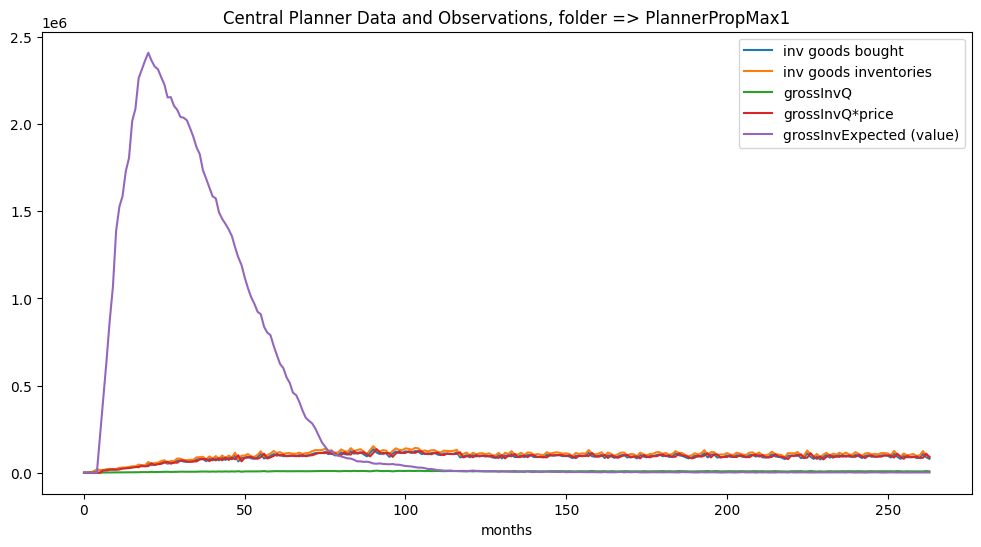

In [6]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


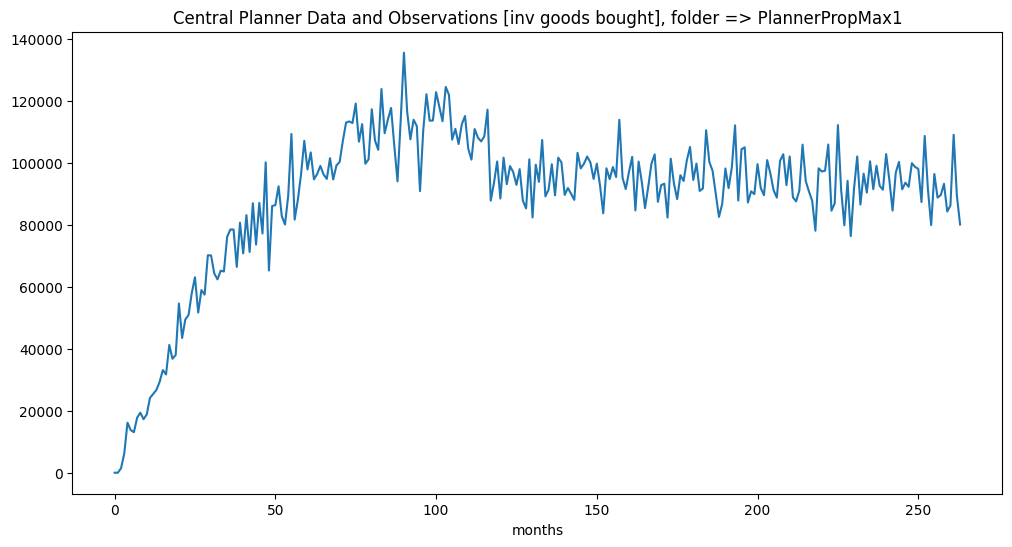

In [7]:
fig=plannerInfo["inv goods bought"].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

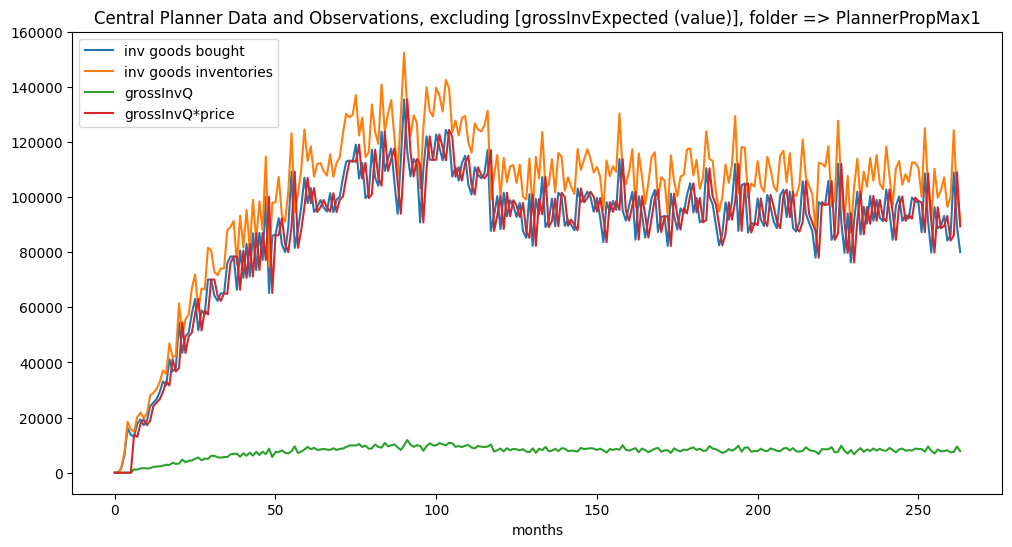

In [8]:
fig=plannerInfo[["inv goods bought", "inv goods inventories", "grossInvQ", "grossInvQ*price"]].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)